<a href="https://colab.research.google.com/github/mcova100-jpg/Machine_Learning/blob/main/Session_6_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 6

Image Processing

###### (No dataset needed)
---


Michael de la Maza

AI/ML

Hult International Business School

Adapted from "Hands-on Machine Learning" by Aurelien Geron

### Image processing with traditional machine learning

In [ ]:
#Load dataset
# Takes time to load

from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame = False, parser = 'auto')

In [ ]:
# Set training and test set

X, y = mnist.data, mnist.target

print(X[:5])
print(X.shape)

print(y[:5])
print(y.shape)

# 70K images, 784 'features' (28x28 pixels)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(70000, 784)
['5' '0' '4' '1' '9']
(70000,)


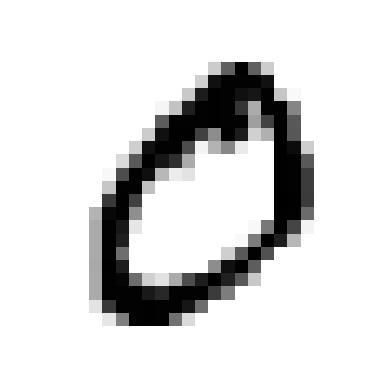

0


In [ ]:
# Plot one of the instances/images

import matplotlib.pyplot as plt

def plot_digit(image_data):
  image = image_data.reshape(28,28)
  plt.imshow(image, cmap="binary")
  plt.axis("off")

some_digit = X[1]
plot_digit(some_digit)
plt.show()

print(y[1])

In [ ]:
# Define training and test set

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]


In [ ]:
# Training classifier to recognize '5'

y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')



In [ ]:
# Train classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict

forest_clf = RandomForestClassifier(random_state=42)


# Takes 1-2 minutes
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [ ]:
# Print probabilities for first two instances

print(y_probas_forest[:2]) # [False True] format

[[0.11 0.89]
 [0.99 0.01]]


In [ ]:
# Plot precision-recall curve
# Refresher: What is precision? What is recall?
# Are the classes balanced?

from sklearn.metrics import precision_recall_curve

y_scores_forest = y_probas_forest[:, 1] # positive class probabilities

precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)


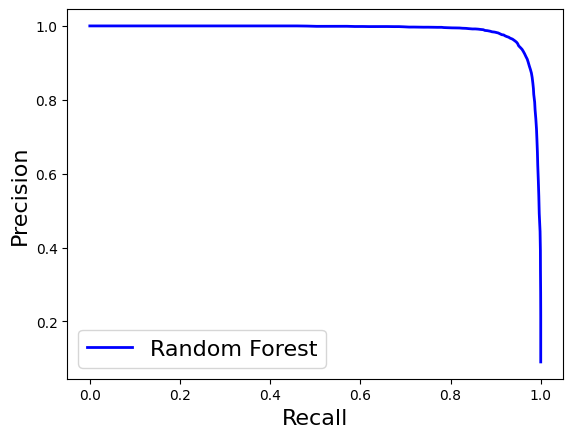

In [ ]:
plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2, label="Random Forest")
plt.xlabel("Recall", fontsize=16)
plt.ylabel("Precision", fontsize=16)
plt.legend(loc="lower left", fontsize=16)
plt.show()

In [ ]:
# Train RandomForestClassifier on training and test set

# Train classifier
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train, y_train_5)

# Predict probabilities on test set
y_probas_forest = forest_clf.predict_proba(X_test)

### Multi-class prediction

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(forest_clf, X_train[:1000], y_train[:1000], cv=3, scoring="accuracy")

# Over 85% accuracy on all folds. Much better than 10% baseline
# Is this surprising?

array([0.86526946, 0.87387387, 0.86486486])

In [ ]:
# Confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay

# Takes 1-2 minutes
y_train_pred = cross_val_predict(forest_clf, X_train, y_train, cv=3)

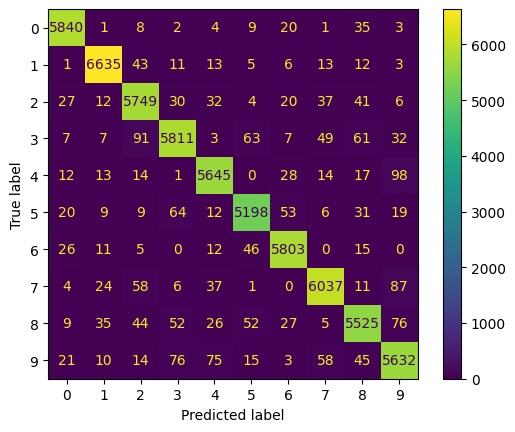

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

In [ ]:
# 5 minute exercise
# Explain this diagram and the major findings to a business audience.
# Why are the numbers along the diagonal largest? means that those are the times that the label was good predicted
# What numbers get confused with other numbers? 4 is confused 98 times with number 9 and 3 with 2 91 times

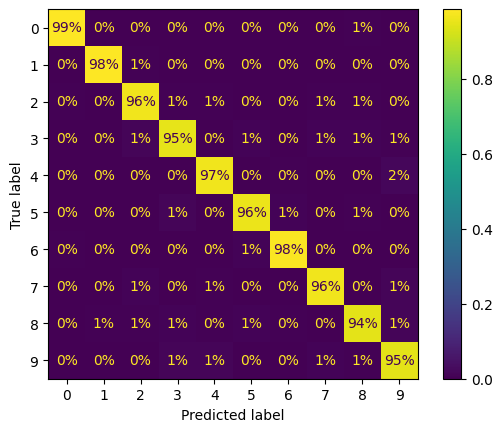

In [ ]:
# Show percentages
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="true", values_format=".0%")

In [ ]:
# 5 minute exercise
# Explain this confusion matrix --> 8 94%,9 3 95%,7 5 2 96%, 4 97% , 6 1 98%, 0 99%
# What number is the easiest to classify (i.e., has the highest classification accuracy)? 0 with 99% Why do you think it is easy to classify? --> 0 higher % the easyest
# Which number is the hardest to classify? Why 8 -->lower %



In [ ]:
# 5 minute exercise
# Modify the ConfusionMatrixDisplay command to show additional precision

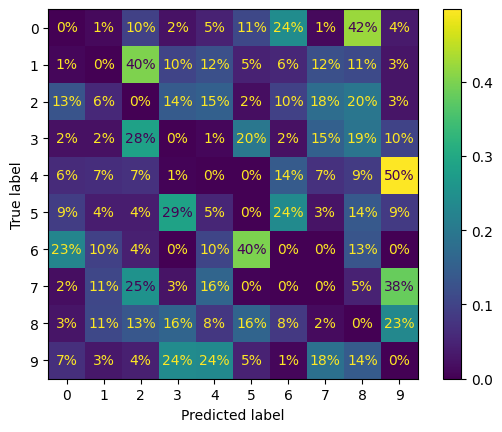

In [ ]:
# Zero out diagonal to make errors clearer

sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, sample_weight=sample_weight, normalize="true", values_format=".0%")

In [ ]:
# Examine 8 and 0 being confused
cl_a, cl_b = '8', '0'
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]



In [ ]:
print(X_aa[0].shape)

(784,)


In [ ]:
# Magic code
import numpy as np

def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

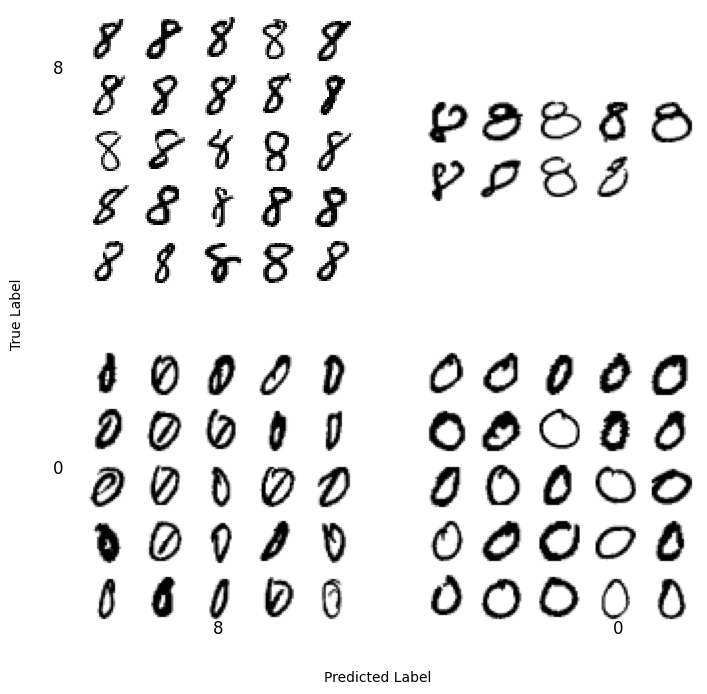

In [ ]:
import matplotlib as mpl

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)

# Magic code
fig = plt.gcf()
fig.text(0.5, 0.04, 'Predicted Label', ha='center')
fig.text(0.04, 0.5, 'True Label', va='center', rotation='vertical')
fig.text(0.1, 0.8, '8', ha='center', fontsize=12)
fig.text(0.3, 0.1, '8', ha='center', fontsize=12)
fig.text(0.1, 0.3, '0', ha='center', fontsize=12)
fig.text(0.8, 0.1, '0', ha='center', fontsize=12)

plt.show()

In [ ]:
# 5 minute exercise
# Modify the code to compare '3' and '5' or two other numbers of your choosing

### Image processing with CNN

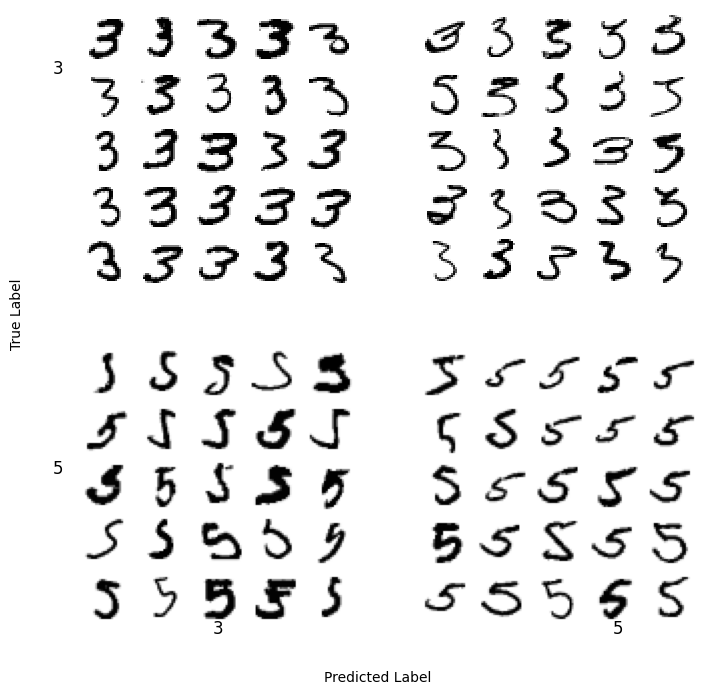

In [ ]:
# Examine 8 and 0 being confused
cl_a, cl_b = '3', '5'
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

# Magic code
import numpy as np
import matplotlib as mpl # Moved this import to the top of the cell

def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)

# Magic code
fig = plt.gcf()
fig.text(0.5, 0.04, 'Predicted Label', ha='center')
fig.text(0.04, 0.5, 'True Label', va='center', rotation='vertical')
fig.text(0.1, 0.8, '3', ha='center', fontsize=12)
fig.text(0.3, 0.1, '3', ha='center', fontsize=12)
fig.text(0.1, 0.3, '5', ha='center', fontsize=12)
fig.text(0.8, 0.1, '5', ha='center', fontsize=12)

plt.show()

In [ ]:
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.utils import to_categorical #-->Deeper neural network layer by layer
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

In [ ]:
# load the dataset
(trainX, trainY), (testX, testY) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# 5 minute exercise
# What is the size of trainX, trainY, testX, testY

In [ ]:
# preprocessing - minimal
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [ ]:
# normalize pixel values to 0 to 1
trainX = trainX.astype('float32') / 255
testX = testX.astype('float32') / 255

In [ ]:
# define the model
# in keras, every layer is defined
# then all layers are combined into a neural network

model = Sequential()
# 32 filters 3x3 convolution of 28x28 image
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
# Takes max value from 2x2 grid
model.add(MaxPooling2D((2, 2)))
# Previous two layers output 2D, this converts to 1D
model.add(Flatten())
# 'Standard' layer with 100 neurons, densely connected
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
# 'Standard' layer with 10 neurons, softmax = multi-class probability
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# optimizer: how to update weights
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# train model - takes 5+ minutes
model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.8961 - loss: 0.3301 - val_accuracy: 0.9704 - val_loss: 0.0910
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9811 - loss: 0.0656 - val_accuracy: 0.9800 - val_loss: 0.0619
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9871 - loss: 0.0429 - val_accuracy: 0.9858 - val_loss: 0.0428
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.9920 - loss: 0.0273 - val_accuracy: 0.9859 - val_loss: 0.0438
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9950 - loss: 0.0181 - val_accuracy: 0.9871 - val_loss: 0.0391
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9968 - loss: 0.0128 - val_accuracy: 0.9862 - val_loss: 0.0417
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9976 - loss: 0.0092 - val_accuracy: 0.9865 - val_loss: 0.0436
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 12ms/step - accuracy: 0.9984 -

In [ ]:
# compute accuracy
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

> 98.650


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       540,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,084,462 (4.14 MB)

 Trainable params: 542,230 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 542,232 (2.07 MB)

In [ ]:
# 5 minute exercise
# Compare to randomforest model

In [ ]:
# 10 minute exercise
# Modify the CNN. What happens to the accuracy?
# Try: Reducing the number of filters from 32 to 4
# model.add(Conv2D(32, (3, 3)

In [ ]:
# The End